# ICT 782 - Day 4 Notes

# Data Wrangling

Data is often drawn in from multiple sources. Different techniques for recording and storing the data can result in a wide variety of problems when it comes time for analysis. Therefore, the data must first be cleaned and/or transformed into a useful format. Today we'll look at data manipulation techniques such as combining datasets, reshaping data, transforming the data, and we'll revisit missing values and outliers. These collective techniques are known as **data wrangling**, a term that conjures images of capturing and taming wild horses.

As usual, we'll use NumPy and pandas throughout this notebook.

In [1]:
import numpy as np
import pandas as pd

## Merging data

### Many-to-one merging

The simplest case of merging two `DataFrame`s can be seen in the next example. We have two datasets and we want to find the values in common with both. Using the function `pd.merge()` with its default keyworded arguments performs this merge.

In [2]:
d1 = pd.DataFrame({'day': np.arange(5),
                   'prec1': [4,3,10,7,1]})
d2 = pd.DataFrame({'day': np.arange(15),
                   'prec2': [10,7,2,3,5,6,11,0,0,2,3,6,6,5,7],
                   'hum': np.random.rand(15)})
pd.merge(d1, d2)

,day,prec1,prec2,hum
0,0,4,10,0.704833
1,1,3,7,0.441861
2,2,10,2,0.104520
3,3,7,3,0.618406
4,4,1,5,0.586158


In the above example, the two `DataFrame`s were merged by overlapping `'day'` values. We could have specified a different column using the `on = <column name>` keyworded argument (providing the specified column is in both `DataFrame`s).

In [3]:
d1 = pd.DataFrame({'day': np.arange(5),
                   'prec': [4,3,10,7,1]})
d2 = pd.DataFrame({'day': np.arange(15),
                   'prec': [10,7,2,3,5,6,11,0,0,2,3,6,6,5,7],
                   'hum': np.random.rand(15)})


,day_x,prec,day_y,hum
0,1,3,3,0.725321
1,1,3,10,0.499882
2,2,10,0,0.287171
3,3,7,1,0.654304
4,3,7,14,0.397373


In [4]:
d1

,day,prec
0,0,4
1,1,3
2,2,10
3,3,7
4,4,1


In [5]:
d2

,day,prec,hum
0,0,10,0.287171
1,1,7,0.654304
2,2,2,0.066953
3,3,3,0.725321
4,4,5,0.529262
5,5,6,0.374567
6,6,11,0.345856
7,7,0,0.103578
8,8,0,0.620267
9,9,2,0.100819


In [11]:
pd.merge(d1, d2, on = 'prec')

,day_x,prec,day_y,hum
0,1,3,3,0.725321
1,1,3,10,0.499882
2,2,10,0,0.287171
3,3,7,1,0.654304
4,3,7,14,0.397373


In [15]:
# Merging with more than one column name matching
d1 = pd.DataFrame({'day': np.arange(5),
                   'prec': [4,3,10,7,1],
                   'hum': np.random.rand(5),
                   'wbc': np.random.rand(5)})
d2 = pd.DataFrame({'day': np.arange(15),
                   'prec': [10,7,2,3,5,6,11,0,0,2,3,6,6,5,7],
                   'hum': np.random.rand(15),
                   'wbc': np.random.rand(15)})
pd.merge(d1, d2, on = 'prec')

,day_x,prec,hum_x,wbc_x,day_y,hum_y,wbc_y
0,1,3,0.376707,0.927887,3,0.440740,0.852604
1,1,3,0.376707,0.927887,10,0.673978,0.813511
2,2,10,0.422135,0.665008,0,0.484082,0.180673
3,3,7,0.050008,0.357152,1,0.709491,0.061228
4,3,7,0.050008,0.357152,14,0.857690,0.665059


Notice how the `pd.merge()` function automatically assigns the suffixes `_x` and `_y` to values from respective `DataFrame` objects. Sometimes the column names don't match between datasets. In that case, we can specify the column name for each `DataFrame` and perform the merge. The example below merges the two `DataFrame`s from above over the `prec_` column. In other words, the objects are merged by overlapping values of `prec1` and `prec2`.

In [16]:
d1 = pd.DataFrame({'day1': np.arange(5),
                   'prec1': [4,3,10,7,1]})
d2 = pd.DataFrame({'day2': np.arange(15),
                   'prec2': [10,7,2,3,5,6,11,0,0,2,3,6,6,5,7],
                   'hum2': np.random.rand(15)})
pd.merge(d1, d2, left_on = 'prec1', right_on = 'prec2')

,day1,prec1,day2,prec2,hum2
0,1,3,3,3,0.916714
1,1,3,10,3,0.724935
2,2,10,0,10,0.966478
3,3,7,1,7,0.867953
4,3,7,14,7,0.691167


If we want to merge two `DataFrame`s over all columns, we can specify the `how = 'outer'` keyworded argument (`how = 'inner'` by default). In particular, `how = 'outer'` results in the **union** of the `DataFrame`s, and `how = 'inner'` results in the **intersection** of the `DataFrame`s. Specifying `how = 'left'` or `how = 'right'` results in the **left-** or **right-union**, respectively.

In [19]:
d1 = pd.DataFrame({'Province': ['BC','AB','SK'],
                   'Liberal %': [40.37, 0.98, 0]})
d2 = pd.DataFrame({'Province': ['MB','ON','QC'],
                   'Liberal %': [14.48, 19.57, 24.82]})

In [20]:
d1

,Province,Liberal %
0,BC,40.37
1,AB,0.98
2,SK,0.00


In [21]:
d2

,Province,Liberal %
0,MB,14.48
1,ON,19.57
2,QC,24.82


In [22]:
pd.merge(d1, d2, how = 'outer')

,Province,Liberal %
0,BC,40.37
1,AB,0.98
2,SK,0.00
3,MB,14.48
4,ON,19.57
5,QC,24.82


### Many-to-many merging

This technique computes the **Cartesian product** of the rows of two merged `DataFrame`s. If you haven't heard of the Cartesian product before, let's look at a brief explanation.

Suppose we have two sets, $X = \{ a,b,c \}$ and $Y = \{ x,y,z \}$. The Cartesian product, denoted $X\times Y$, is the set of all possible combinations of 'ordered' pairs from $X$ and $Y$. The term 'ordered' means that, for a given pair of values, the first value comes from $X$ and the second value comes from $Y$. In this case, the Cartesian product $X\times Y$ is the set:
$$
    X\times Y = \{ (a,x), (a,y), (a,z), (b,x), (b,y), (b,z), (c,x), (c,y), (c,z) \}.
$$

Since there were 3 values in both $X$ and $Y$, the Cartesian product $X\times Y$ contains $3\times3= 9$ ordered pairs.

Let's see what this looks like for `DataFrame`s.

In [23]:
D1 = pd.DataFrame({'day': np.arange(4),
                   'grp': ['x','y','y','z']})
D2 = pd.DataFrame({'day': np.arange(7),
                   'grp': ['z','x','y','y','z','x','y']})

In [24]:
D1

,day,grp
0,0,x
1,1,y
2,2,y
3,3,z


In [25]:
D2

,day,grp
0,0,z
1,1,x
2,2,y
3,3,y
4,4,z
5,5,x
6,6,y


In [26]:
pd.merge(D1, D2, on = 'grp')

,day_x,grp,day_y
0,0,x,1
1,0,x,5
2,1,y,2
3,1,y,3
4,1,y,6
5,2,y,2
6,2,y,3
7,2,y,6
8,3,z,0
9,3,z,4


Here we can see that the Cartesian product was taken on each row. In `D1`, there was 1 row containing `'x'`, and `D2` had 2 rows containing `'x'`, so the resulting merge has $2\times1 = 2$ rows containing `'x'`. The same pattern is followed for the `'y'` and `'z'` values.

### Merging by index

We can also merge `DataFrame`s by index. To do this, we use the `join()` method of the `DataFrame` object. If we have two or more objects with similar indexes and unique column keys, then the join works as expected.

If we have two or more objects with similar indexes and the same column keys, we need to specify string arguments for the `lsuffix` and `rsuffix` parameters as shown below.

In [27]:
# Joining by index: unique column keys
G1 = pd.DataFrame({'PEI': [6994,153584,],
                   'NB': [36966,770921],
                   'NFLD': [33241,525604],
                   'NS': [44354,959500]}, 
                   index = ['GDP','Pop']) 
G2 = pd.DataFrame({'QC': [439375,8387632], 
                   'ON': [857384,14318545], 
                   'MB': [344812,4300721], 
                   'SK': [80679,1162978]}, 
                   index = ['GDP','Pop'])

In [28]:
G1

,PEI,NB,NFLD,NS
GDP,6994,36966,33241,44354
Pop,153584,770921,525604,959500


In [29]:
G2

,QC,ON,MB,SK
GDP,439375,857384,344812,80679
Pop,8387632,14318545,4300721,1162978


In [30]:
G1.join(G2)

,PEI,NB,NFLD,NS,QC,ON,MB,SK
GDP,6994,36966,33241,44354,439375,857384,344812,80679
Pop,153584,770921,525604,959500,8387632,14318545,4300721,1162978


In [31]:
# Joining by index: same column keys
F1 = pd.DataFrame({'day': [55,65,75,85],
                   'grp': ['x','y','y','z']})
F2 = pd.DataFrame({'day': [77,87,97,107], 
                   'grp': ['X','Y','W','Z']})

In [32]:
F1

,day,grp
0,55,x
1,65,y
2,75,y
3,85,z


In [33]:
F2

,day,grp
0,77,X
1,87,Y
2,97,W
3,107,Z


In [34]:
F1.join(F2, lsuffix = '_F1', rsuffix = '_F2')

,day_F1,grp_F1,day_F2,grp_F2
0,55,x,77,X
1,65,y,87,Y
2,75,y,97,W
3,85,z,107,Z


## Concatenating data

In the example above, we saw two `DataFrame` objects with the same indexes and unique column keys simply joined together. We could describe this joining as 'stacking' or *concatenating* the columns side-by-side.

In general cases, we can concatenate columns or rows of pandas objects together using the `pd.concat()` function. We control whether we stack rows or columns by passing the `axis = 0` or `axis = 1` argument, respectively.

In [37]:
# Concatenating rows

S1 = pd.Series([55, 54], index = ['a','b'])
S2 = pd.Series([65, 64], index = ['c','d'])
S3 = pd.Series([75, 74, 73], index = ['e','f','g'])
S4 = pd.Series([85, 84], index = ['h','i'])

In [36]:
S1

a    55
b    54
dtype: int64

In [38]:
S2

c    65
d    64
dtype: int64

In [39]:
S3

e    75
f    74
g    73
dtype: int64

In [40]:
S4

h    85
i    84
dtype: int64

In [41]:
pd.concat([S1,S2,S3,S4], axis = 0)

a    55
b    54
c    65
d    64
e    75
f    74
g    73
h    85
i    84
dtype: int64

In [42]:
# Concatenating columns
pd.concat([S1,S2,S3,S4], axis = 1, sort = False)

,0,1,2,3
a,55.0,NaN,NaN,NaN
b,54.0,NaN,NaN,NaN
c,NaN,65.0,NaN,NaN
d,NaN,64.0,NaN,NaN
e,NaN,NaN,75.0,NaN
f,NaN,NaN,74.0,NaN
g,NaN,NaN,73.0,NaN
h,NaN,NaN,NaN,85.0
i,NaN,NaN,NaN,84.0


If we want to be able to see where the column values came from, we can create a hierarchical index by specifying the `keys` argument.

In [43]:
pd.concat([S1,S2,S3,S4], keys = ['S1','S2','S3','S4'])

S1  a    55
    b    54
S2  c    65
    d    64
S3  e    75
    f    74
    g    73
S4  h    85
    i    84
dtype: int64

## The `stack()` and `unstack()` methods

Pivoting is a common technique with tabular data. This technique takes data from the columns and places it into the rows, or vice-versa. To switch column data with row data, we use the `stack()` method. This creates a hierarchical index for the rows.

In [65]:
E1 = pd.DataFrame(np.random.rand(12).reshape((4,3)), index = ['AB','BC','SK','MB'], columns = ['col1','col2','col3'])
E1

,col1,col2,col3
AB,0.179493,0.191422,0.919794
BC,0.868179,0.940167,0.317830
SK,0.954700,0.782239,0.917879
MB,0.868111,0.560133,0.637974


In [45]:
E1.stack()

AB  col1    0.672551
    col2    0.508735
    col3    0.586019
BC  col1    0.419380
    col2    0.878415
    col3    0.718245
SK  col1    0.272120
    col2    0.273061
    col3    0.006707
MB  col1    0.733575
    col2    0.526550
    col3    0.013651
dtype: float64

To return the data from the rows to the columns, we use the `unstack()` method.

In [46]:
E2 = E1.stack()
E2.unstack()

,col1,col2,col3
AB,0.672551,0.508735,0.586019
BC,0.419380,0.878415,0.718245
SK,0.272120,0.273061,0.006707
MB,0.733575,0.526550,0.013651


In [67]:
# Inserting subtotals into the stacked Series
E1['subtotal'] = np.nan

for index in E1.index:
    E1['subtotal'].loc[index] = E1.loc[index].sum(axis = 0)
E1

,col1,col2,col3,subtotal
AB,0.179493,0.191422,0.919794,1.290709
BC,0.868179,0.940167,0.317830,2.126176
SK,0.954700,0.782239,0.917879,2.654818
MB,0.868111,0.560133,0.637974,2.066218


In [68]:
E1.stack()

AB  col1        0.179493
    col2        0.191422
    col3        0.919794
    subtotal    1.290709
BC  col1        0.868179
    col2        0.940167
    col3        0.317830
    subtotal    2.126176
SK  col1        0.954700
    col2        0.782239
    col3        0.917879
    subtotal    2.654818
MB  col1        0.868111
    col2        0.560133
    col3        0.637974
    subtotal    2.066218
dtype: float64

In [69]:
E1.stack().sum()

16.275843381163945

The `pivot()` method is similar to `stack()`, and is most useful for time series data. We'll introduce it using an example at the end of these notes.

# Transforming Data

This is where we clean the data for later use. Before we dig into the practical details of data transformations, we'll first define what it means to 'clean' data.

> **Data cleaning** is the process of preparing and standardizing data for analysis. This process includes combining datasets, renaming or dropping variables, dealing with missing values, and formatting data types within datasets.

With all of the below methods, we can change the `DataFrame` object itself without creating a copy by specifying the keyworded argument `inplace = True`.

## Duplicated row data

Let's begin with one of the simplest transformations: removing duplicated rows. We'll start with a `DataFrame` that has duplicated rows, and then we'll remove one of the duplicates.

In [70]:
data = pd.DataFrame({'col1': ['M','M','M','F','M','F','F'], 
                     'col2': [1.1, 2.2, 1.1, 1.3, 2.1, 1.3, 1.5]})
data

,col1,col2
0,M,1.1
1,M,2.2
2,M,1.1
3,F,1.3
4,M,2.1
5,F,1.3
6,F,1.5


We see that rows 0 and 2 and rows 3 and 5 are duplicates. Alternatively, we can see a boolean `DataFrame` of duplicated rows using the `duplicated()` method.

In [71]:
data.duplicated()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
dtype: bool

To drop these duplicates, we use the `drop_duplicates()` method. If we want to keep the first instance of the duplicated row, we can specify `keep = 'first'`. Alternatively, use `keep = 'last'` to keep the last instance of the duplicate. If we want to remove both instances of the duplicated row(s), we use `keep = False` (we'll see an example of this usage below).

**Note:** this method returns a copy of the `DataFrame`. To change the `DataFrame` itself, use `inplace = True`.

In [72]:
data.drop_duplicates(keep = 'first')

,col1,col2
0,M,1.1
1,M,2.2
3,F,1.3
4,M,2.1
6,F,1.5


In [73]:
data.drop_duplicates(keep = 'last')

,col1,col2
1,M,2.2
2,M,1.1
4,M,2.1
5,F,1.3
6,F,1.5


We can also specify particular columns to search for duplicates using the argument `subset = [<column labels to search for duplicates>]`.

In [75]:
data1 = pd.DataFrame({'col1': ['a','b','c','d','a'], 
                      'col2': np.random.rand(5), 
                      'col3': [1,1,2,3,4]})
data1

,col1,col2,col3
0,a,0.684009,1
1,b,0.902446,1
2,c,0.312029,2
3,d,0.141866,3
4,a,0.807914,4


In [76]:
data1.drop_duplicates(subset = 'col1')

,col1,col2,col3
0,a,0.684009,1
1,b,0.902446,1
2,c,0.312029,2
3,d,0.141866,3


In [77]:
data1.drop_duplicates(subset = 'col3')

,col1,col2,col3
0,a,0.684009,1
2,c,0.312029,2
3,d,0.141866,3
4,a,0.807914,4


## When to drop column data

Recall that we may use the `drop()` method when we want to remove a column from a `DataFrame`. The question might be asked: 'When is it safe to do this?'

Suppose that we are given the dataset below. This dataset is a financial document issued by the California State Treasurer and found at the [California Open Data Portal](https://data.ca.gov/dataset/solano-county). There are 67 total variables, so rather than list them here we'll just view the dataset.

In [78]:
data = pd.read_csv('Solano_County.csv')
data

,CDIAC Number,Issuer,Issuance Documents,Sold Status,Sale Date,ADTR Report,ADTR Filing Status,ADTR Reportable,ADTR Reportable Next Fiscal Year,ADTR Last Reported Year,...,Placement Agent Fee,Financial Advisor Fee,Bond Counsel Fee,Co-Bond Counsel Fee,Disclosure Counsel Fee,Borrower Counsel Fee,Trustee Fee,Credit Enhancement Fee,Rating Agency Fee,Other Issuance Expenses
0,1985-0093,Fairfield,Pending (http://cdiacdocs.sto.ca.gov/Pending.pdf),SOLD,02/11/1985 12:00:00 AM,No Report (http://cdiacdocs.sto.ca.gov/NoRepor...,N/A (http://cdiacdocs.sto.ca.gov/ADTRFilingSta...,N,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1985-1572,Fairfield Redevelopment Agency,Pending (http://cdiacdocs.sto.ca.gov/Pending.pdf),SOLD,12/03/1985 12:00:00 AM,No Report (http://cdiacdocs.sto.ca.gov/NoRepor...,N/A (http://cdiacdocs.sto.ca.gov/ADTRFilingSta...,N,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1998-0480,Fairfield Public Financing Authority,None Submitted (http://cdiacdocs.sto.ca.gov/No...,SOLD,04/23/1998 12:00:00 AM,No Report (http://cdiacdocs.sto.ca.gov/NoRepor...,N/A (http://cdiacdocs.sto.ca.gov/ADTRFilingSta...,N,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-0001,Vacaville Unified School District,2009-0001.pdf (http://cdiacdocs.sto.ca.gov/200...,SOLD,11/19/2008 12:00:00 AM,No Report (http://cdiacdocs.sto.ca.gov/NoRepor...,N/A (http://cdiacdocs.sto.ca.gov/ADTRFilingSta...,N,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1994-1298,Solano County,Pending (http://cdiacdocs.sto.ca.gov/Pending.pdf),SOLD,09/08/1994 12:00:00 AM,No Report (http://cdiacdocs.sto.ca.gov/NoRepor...,N/A (http://cdiacdocs.sto.ca.gov/ADTRFilingSta...,N,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,2016-3115,Fairfield,2016-3115.pdf (http://cdiacdocs.sto.ca.gov/201...,SOLD,03/22/2017 12:00:00 AM,2016-3115 Report (https://debtwatch.treasurer....,LATE (http://cdiacdocs.sto.ca.gov/ADTRFilingSt...,Y,Yes,06/30/2018 12:00:00 AM,...,0.0,46500.0,55000.0,0.0,40000.0,0.0,2500.0,60239.66,31000.0,46275.53
596,2017-1419,Travis Unified School District,2017-1419.pdf (http://cdiacdocs.sto.ca.gov/201...,SOLD,06/01/2017 12:00:00 AM,2017-1419 Report (https://debtwatch.treasurer....,FILED (http://cdiacdocs.sto.ca.gov/ADTRFilingS...,Y,Yes,06/30/2019 12:00:00 AM,...,5000.0,22500.0,17500.0,0.0,0.0,0.0,0.0,0.00,0.0,10270.74
597,2018-1069,Rio Vista CFD No 2004-1,2018-1069.pdf (http://cdiacdocs.sto.ca.gov/201...,SOLD,06/28/2018 12:00:00 AM,2018-1069 Report (https://debtwatch.treasurer....,LATE (http://cdiacdocs.sto.ca.gov/ADTRFilingSt...,Y,Yes,06/30/2018 12:00:00 AM,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
598,2017-0363,Dixon Unified School District,2017-0363.pdf (http://cdiacdocs.sto.ca.gov/201...,SOLD,03/23/2017 12:00:00 AM,2017-0363 Report (https://debtwatch.treasurer....,FILED (http://cdiacdocs.sto.ca.gov/ADTRFilingS...,Y,Yes,06/30/2019 12:00:00 AM,...,0.0,55000.0,50000.0,0.0,25000.0,0.0,2000.0,0.00,18500.0,12195.00


Notice that we have two unique identifiers for each row of data. First, we have an index to identify each row. Second, the `CDIAC Number` is a unique identifier for each transaction in the set. 

We don't need two unique identifiers for each row, as additional unique identifiers don't add any vital information to the dataset. Therefore, we can safely drop one of the columns. Which one?

In principle, we can drop either unique identifier. In this case, we'll drop the `CDIAC Number` column, since it is easier to access data by index than by an 8-digit number. If, for some reason, we wanted to use the `CDIAC Number` for analysis, then we would re-assign it as our index variable.

In [79]:
data.drop('CDIAC Number', axis = 1, inplace = True)
data

,Issuer,Issuance Documents,Sold Status,Sale Date,ADTR Report,ADTR Filing Status,ADTR Reportable,ADTR Reportable Next Fiscal Year,ADTR Last Reported Year,Debt Policy,...,Placement Agent Fee,Financial Advisor Fee,Bond Counsel Fee,Co-Bond Counsel Fee,Disclosure Counsel Fee,Borrower Counsel Fee,Trustee Fee,Credit Enhancement Fee,Rating Agency Fee,Other Issuance Expenses
0,Fairfield,Pending (http://cdiacdocs.sto.ca.gov/Pending.pdf),SOLD,02/11/1985 12:00:00 AM,No Report (http://cdiacdocs.sto.ca.gov/NoRepor...,N/A (http://cdiacdocs.sto.ca.gov/ADTRFilingSta...,N,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fairfield Redevelopment Agency,Pending (http://cdiacdocs.sto.ca.gov/Pending.pdf),SOLD,12/03/1985 12:00:00 AM,No Report (http://cdiacdocs.sto.ca.gov/NoRepor...,N/A (http://cdiacdocs.sto.ca.gov/ADTRFilingSta...,N,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fairfield Public Financing Authority,None Submitted (http://cdiacdocs.sto.ca.gov/No...,SOLD,04/23/1998 12:00:00 AM,No Report (http://cdiacdocs.sto.ca.gov/NoRepor...,N/A (http://cdiacdocs.sto.ca.gov/ADTRFilingSta...,N,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Vacaville Unified School District,2009-0001.pdf (http://cdiacdocs.sto.ca.gov/200...,SOLD,11/19/2008 12:00:00 AM,No Report (http://cdiacdocs.sto.ca.gov/NoRepor...,N/A (http://cdiacdocs.sto.ca.gov/ADTRFilingSta...,N,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Solano County,Pending (http://cdiacdocs.sto.ca.gov/Pending.pdf),SOLD,09/08/1994 12:00:00 AM,No Report (http://cdiacdocs.sto.ca.gov/NoRepor...,N/A (http://cdiacdocs.sto.ca.gov/ADTRFilingSta...,N,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Fairfield,2016-3115.pdf (http://cdiacdocs.sto.ca.gov/201...,SOLD,03/22/2017 12:00:00 AM,2016-3115 Report (https://debtwatch.treasurer....,LATE (http://cdiacdocs.sto.ca.gov/ADTRFilingSt...,Y,Yes,06/30/2018 12:00:00 AM,N,...,0.0,46500.0,55000.0,0.0,40000.0,0.0,2500.0,60239.66,31000.0,46275.53
596,Travis Unified School District,2017-1419.pdf (http://cdiacdocs.sto.ca.gov/201...,SOLD,06/01/2017 12:00:00 AM,2017-1419 Report (https://debtwatch.treasurer....,FILED (http://cdiacdocs.sto.ca.gov/ADTRFilingS...,Y,Yes,06/30/2019 12:00:00 AM,Y,...,5000.0,22500.0,17500.0,0.0,0.0,0.0,0.0,0.00,0.0,10270.74
597,Rio Vista CFD No 2004-1,2018-1069.pdf (http://cdiacdocs.sto.ca.gov/201...,SOLD,06/28/2018 12:00:00 AM,2018-1069 Report (https://debtwatch.treasurer....,LATE (http://cdiacdocs.sto.ca.gov/ADTRFilingSt...,Y,Yes,06/30/2018 12:00:00 AM,Y,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
598,Dixon Unified School District,2017-0363.pdf (http://cdiacdocs.sto.ca.gov/201...,SOLD,03/23/2017 12:00:00 AM,2017-0363 Report (https://debtwatch.treasurer....,FILED (http://cdiacdocs.sto.ca.gov/ADTRFilingS...,Y,Yes,06/30/2019 12:00:00 AM,Y,...,0.0,55000.0,50000.0,0.0,25000.0,0.0,2000.0,0.00,18500.0,12195.00


Dropping redundant column information in this way helps to reduce a dataset to its essential information and is an important step in data cleaning.

## Generating new column data

### *Example:* Regression

For many applications such as linear regression, new columns of data must be generated based on original data. For example, suppose we have a dataset comprised of 3 variables, $y$, $x_1$, and $x_2$. Our goal is to fit a 2nd degree polynomial (a quadratic function) to the dataset, where $y$ is a function of $x_1$ and $x_2$. The complete model for such a polynomial would be
$$
    y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_1^2 + \beta_4x_2^2 + \beta_5x_1x_2 + \epsilon,
$$
where $\epsilon$ is the error term. In order to estimate the $\beta$ parameters, we need data for $x_1^2$, $x_2^2$, and $x_1x_2$. Computing this extra data is easy with pandas.

**Note:** We'll talk about regression in far more detail in future weeks.

In [80]:
reg = pd.DataFrame({'y': np.random.rand(25), 
                    'x1': np.random.rand(25), 
                    'x2': np.random.rand(25)})
reg

,y,x1,x2
0,0.617015,0.841458,0.196293
1,0.766940,0.257116,0.949329
2,0.077273,0.848033,0.726400
3,0.068510,0.238300,0.922662
4,0.753962,0.679777,0.168516
5,0.182445,0.090650,0.446724
6,0.469684,0.465329,0.951026
7,0.331041,0.489335,0.450422
8,0.566512,0.046713,0.104399
9,0.025380,0.365131,0.869685


In [81]:
reg['x12'] = reg['x1']**2
reg['x22'] = reg['x2']**2
reg['x1x2'] = reg['x1']*reg['x2']
reg

,y,x1,x2,x12,x22,x1x2
0,0.617015,0.841458,0.196293,0.708052,0.038531,0.165172
1,0.766940,0.257116,0.949329,0.066109,0.901226,0.244088
2,0.077273,0.848033,0.726400,0.719160,0.527658,0.616011
3,0.068510,0.238300,0.922662,0.056787,0.851304,0.219870
4,0.753962,0.679777,0.168516,0.462097,0.028398,0.114553
5,0.182445,0.090650,0.446724,0.008217,0.199562,0.040496
6,0.469684,0.465329,0.951026,0.216531,0.904451,0.442540
7,0.331041,0.489335,0.450422,0.239449,0.202880,0.220408
8,0.566512,0.046713,0.104399,0.002182,0.010899,0.004877
9,0.025380,0.365131,0.869685,0.133320,0.756351,0.317549


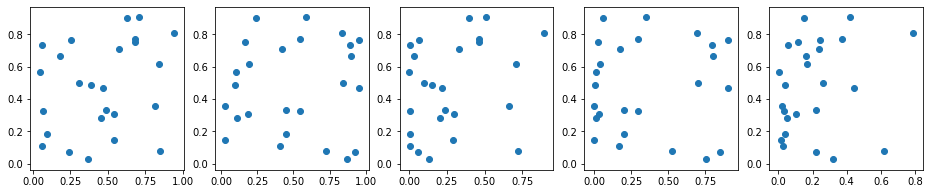

In [86]:
# Scatterplot of y vs x1 and y vs x2
%matplotlib inline

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,5, figsize = (16,3))

ax[0].scatter(reg['x1'], reg['y'])
ax[1].scatter(reg['x2'], reg['y'])
ax[2].scatter(reg['x12'], reg['y'])
ax[3].scatter(reg['x22'], reg['y'])
ax[4].scatter(reg['x1x2'], reg['y']);

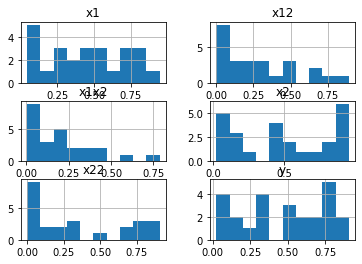

In [88]:
reg.hist();

## The `replace()` method

In data cleaning, we often want to replace values of a pandas object with some specified value. For example, suppose that missing data was coded as `-999` during the data collection procedure. We can easily replace all instances of `-999` with a value of our choice by using the `replace()` method.

In [89]:
census = pd.DataFrame({'income': [54000,-999,66000,76000,-999], 
                       'age': [25,76,30,-999,19]})
census

,income,age
0,54000,25
1,-999,76
2,66000,30
3,76000,-999
4,-999,19


In [90]:
census.replace(-999, np.nan)

,income,age
0,54000.0,25.0
1,NaN,76.0
2,66000.0,30.0
3,76000.0,NaN
4,NaN,19.0


If there is more than one value we would like to replace, we can specify all values to replace and their replacements with a dictionary. Suppose that missing values were coded as `-999`, `NA`, and `missing` by data collectors. We'll replace `-999` with `0`, and `NA` and `missing` with `np.nan` using a dictionary as an argument for the `replace()` method.

In [132]:
census2 = pd.DataFrame({'income': [54000,-999,66000,76000,-999], 
                        'age': [25,76,30,-999,19], 
                        'gender': ['NA','M','F','missing','M']})
census2

,income,age,gender
0,54000,25,NA
1,-999,76,M
2,66000,30,F
3,76000,-999,missing
4,-999,19,M


In [92]:
census2.replace({-999: 0, 'NA': np.nan, 'missing': np.nan}, inplace = True)
census2

,income,age,gender
0,54000,25,NaN
1,0,76,M
2,66000,30,F
3,76000,0,NaN
4,0,19,M


In [100]:
# Another example
census2 = pd.DataFrame({'income': [54000,'-999e',66000,76000,-999], 
                        'age': [25,76,30,-999,'19fe'], 
                        'gender': ['NA','M','F','missing','M']})
census2

,income,age,gender
0,54000,25,NA
1,-999e,76,M
2,66000,30,F
3,76000,-999,missing
4,-999,19fe,M


In [131]:
census2[['income','age']].replace(r'.+e', 999, regex = True)

,income,age
0,54000,25
1,999,76
2,66000,30
3,76000,-999
4,-999,999


## The `rename()` method

To avoid creating copies of a `DataFrame` with different index or column names, we can use the `rename()` method. This method changes the object in-place when we specify `inplace = True`.

To change all index or column labels, we can use the `index` or `columns` arguments, respectively. For these arguments, we can either pass in a function (or `lambda` function) or a dictionary, as in the following examples.

In [133]:
# Passing in functions to rename index and columns
census2.rename(index = lambda x: x + 12, columns = str.upper, inplace = True)
census2

,INCOME,AGE,GENDER
12,54000,25,NA
13,-999,76,M
14,66000,30,F
15,76000,-999,missing
16,-999,19,M


In [134]:
# Passing in a dictionary to rename index and columns
census2.rename(index = {14: 'Fourteen', 16: 'Sixteen'}, 
               columns = {'GENDER': 'SEX'}, inplace = True)
census2

,INCOME,AGE,SEX
12,54000,25,NA
13,-999,76,M
Fourteen,66000,30,F
15,76000,-999,missing
Sixteen,-999,19,M


## The `pd.cut()` and `pd.qcut()` functions

These functions are most often used when we have a collection of continuous values that we want to place into separate 'bins'. For example, in a survey about TV watching habits, we may ask respondents to record their ages. Later on, we may wish to analyze different age groups. Our method of dividing up age groups might be to place ages into the following bins: `[18, 25), [25,35), [35,44), [44, 60), [60, 60+)`.

While this may or may not be realistic, it will serve our purposes. We can cut divide up the dataset using the `pd.cut()` function, and we'll pass in a list of left-endpoints of the above bins. We'll use `[60, 110)` for the `60+` bin.

**Note:** the `pd.cut()` function can only take in a `Series`, so data contained in a `DataFrame` column must be passed in as a 1-dimensional `Series`.

In [135]:
TV = pd.DataFrame({'age': np.random.randint(18,110,15), 
                   'hours': np.random.randint(0,10,15)})
TV

,age,hours
0,91,6
1,90,3
2,43,2
3,44,3
4,31,5
5,92,8
6,64,8
7,96,1
8,58,6
9,39,0


In [136]:
bins = [18, 25, 35, 44, 60, 110]
age_bins = pd.cut(TV['age'], bins)
age_bins

0     (60, 110]
1     (60, 110]
2      (35, 44]
3      (35, 44]
4      (25, 35]
5     (60, 110]
6     (60, 110]
7     (60, 110]
8      (44, 60]
9      (35, 44]
10    (60, 110]
11    (60, 110]
12     (18, 25]
13     (44, 60]
14    (60, 110]
Name: age, dtype: category
Categories (5, interval[int64]): [(18, 25] < (25, 35] < (35, 44] < (44, 60] < (60, 110]]

The result is a `Series` where each row entry keeps track of the corresponding bin for that row. We can count the number of ages in each bin using the `pd.value_counts()` function.

In [137]:
pd.value_counts(age_bins)

(60, 110]    8
(35, 44]     3
(44, 60]     2
(25, 35]     1
(18, 25]     1
Name: age, dtype: int64

There's one thing off about the above `age_bins` object. When we displayed the object, it shows that each bin doesn't include the left endpoint. This happens by default. If we want to include the left endpoint, we pass in `right = False`.

In [138]:
age_bins = pd.cut(TV['age'], bins, right = False)
age_bins

0     [60, 110)
1     [60, 110)
2      [35, 44)
3      [44, 60)
4      [25, 35)
5     [60, 110)
6     [60, 110)
7     [60, 110)
8      [44, 60)
9      [35, 44)
10    [60, 110)
11    [60, 110)
12     [18, 25)
13     [44, 60)
14    [60, 110)
Name: age, dtype: category
Categories (5, interval[int64]): [[18, 25) < [25, 35) < [35, 44) < [44, 60) < [60, 110)]

If we don't know beforehand the exact bins, but we know that we want to divide up the data into `k` evenly spaced bins, then we can pass in an integer to represent the number of bins instead of `bins` as above.

In [139]:
pd.cut(TV['age'], 5, right = False)

0        [73.8, 91.4)
1        [73.8, 91.4)
2        [38.6, 56.2)
3        [38.6, 56.2)
4        [21.0, 38.6)
5     [91.4, 109.088)
6        [56.2, 73.8)
7     [91.4, 109.088)
8        [56.2, 73.8)
9        [38.6, 56.2)
10       [56.2, 73.8)
11       [73.8, 91.4)
12       [21.0, 38.6)
13       [38.6, 56.2)
14    [91.4, 109.088)
Name: age, dtype: category
Categories (5, interval[float64]): [[21.0, 38.6) < [38.6, 56.2) < [56.2, 73.8) < [73.8, 91.4) < [91.4, 109.088)]

We can also divide up data according to its quantiles using the `qcut()` method. To separate the data into `k` quantiles, we pass in an integer argument. In this example, we'll divide a dataset of 24 random values into bins comprised of 4 quantiles.

In [140]:
ran = pd.Series(np.random.rand(24))
ran

0     0.260186
1     0.308232
2     0.029040
3     0.929205
4     0.790526
5     0.898916
6     0.180575
7     0.502963
8     0.076884
9     0.473009
10    0.412149
11    0.314838
12    0.901157
13    0.253687
14    0.373540
15    0.092367
16    0.918496
17    0.096566
18    0.710677
19    0.007711
20    0.305751
21    0.457984
22    0.861883
23    0.411396
dtype: float64

In [141]:
# Divide the data into 4 quantiles
pd.qcut(ran, 4)

0       (0.235, 0.392]
1       (0.235, 0.392]
2     (0.00671, 0.235]
3       (0.731, 0.929]
4       (0.731, 0.929]
5       (0.731, 0.929]
6     (0.00671, 0.235]
7       (0.392, 0.731]
8     (0.00671, 0.235]
9       (0.392, 0.731]
10      (0.392, 0.731]
11      (0.235, 0.392]
12      (0.731, 0.929]
13      (0.235, 0.392]
14      (0.235, 0.392]
15    (0.00671, 0.235]
16      (0.731, 0.929]
17    (0.00671, 0.235]
18      (0.392, 0.731]
19    (0.00671, 0.235]
20      (0.235, 0.392]
21      (0.392, 0.731]
22      (0.731, 0.929]
23      (0.392, 0.731]
dtype: category
Categories (4, interval[float64]): [(0.00671, 0.235] < (0.235, 0.392] < (0.392, 0.731] < (0.731, 0.929]]

In [142]:
# Divide the data into 10 quantiles
pd.qcut(ran, 10)

0          (0.26, 0.31]
1          (0.26, 0.31]
2     (0.00671, 0.0815]
3          (0.9, 0.929]
4        (0.524, 0.819]
5          (0.819, 0.9]
6         (0.147, 0.26]
7        (0.449, 0.524]
8     (0.00671, 0.0815]
9        (0.449, 0.524]
10       (0.392, 0.449]
11        (0.31, 0.392]
12         (0.9, 0.929]
13        (0.147, 0.26]
14        (0.31, 0.392]
15      (0.0815, 0.147]
16         (0.9, 0.929]
17      (0.0815, 0.147]
18       (0.524, 0.819]
19    (0.00671, 0.0815]
20         (0.26, 0.31]
21       (0.449, 0.524]
22         (0.819, 0.9]
23       (0.392, 0.449]
dtype: category
Categories (10, interval[float64]): [(0.00671, 0.0815] < (0.0815, 0.147] < (0.147, 0.26] < (0.26, 0.31] ... (0.449, 0.524] < (0.524, 0.819] < (0.819, 0.9] < (0.9, 0.929]]

In [148]:
pd.value_counts(pd.qcut(ran, 10))

(0.9, 0.929]         3
(0.449, 0.524]       3
(0.26, 0.31]         3
(0.00671, 0.0815]    3
(0.819, 0.9]         2
(0.524, 0.819]       2
(0.392, 0.449]       2
(0.31, 0.392]        2
(0.147, 0.26]        2
(0.0815, 0.147]      2
dtype: int64

## Sampling from pandas objects

For many analysis procedures, it is often necessary to randomly sample from a dataset to generate validation or testing subsets. 

Random sampling from pandas objects is simply done with the `sample()` method. There are two main schemes for random sampling:
1. Sampling with replacement - possible to choose an element more than once.
2. Sampling without replacement - not possible to choose an element more than once.
The sampling scheme is specified with the boolean `replace` argument in the `sample()` method.

In [149]:
complete_data = pd.DataFrame(np.random.rand(100).reshape((25,4)), 
                             columns = ['A','B','C','D'])
complete_data

,A,B,C,D
0,0.502601,0.046990,0.838727,0.309861
1,0.541960,0.192292,0.193663,0.107189
2,0.442661,0.363224,0.434910,0.094325
3,0.027822,0.955126,0.610359,0.160730
4,0.152111,0.840697,0.968122,0.808114
5,0.719673,0.504040,0.061414,0.217585
6,0.908574,0.849422,0.855147,0.528692
7,0.096795,0.505386,0.308216,0.000009
8,0.110553,0.597888,0.722972,0.131887
9,0.827299,0.566965,0.614599,0.426753


In [150]:
# Sampling with replacement
n_samples = 10
complete_data.sample(n_samples, replace = True)

,A,B,C,D
22,0.585743,0.516562,0.728725,0.867899
12,0.826923,0.483997,0.212412,0.613797
2,0.442661,0.363224,0.434910,0.094325
11,0.881196,0.885223,0.093296,0.534725
3,0.027822,0.955126,0.610359,0.160730
5,0.719673,0.504040,0.061414,0.217585
0,0.502601,0.046990,0.838727,0.309861
22,0.585743,0.516562,0.728725,0.867899
16,0.782721,0.498882,0.461414,0.152469
18,0.648455,0.701479,0.142029,0.679891


In [151]:
# Sampling without replacement
n_samples = 10
complete_data.sample(n_samples, replace = False)

,A,B,C,D
13,0.918389,0.349856,0.421291,0.670159
12,0.826923,0.483997,0.212412,0.613797
10,0.831464,0.793825,0.322087,0.828307
0,0.502601,0.046990,0.838727,0.309861
23,0.293106,0.199647,0.416473,0.149596
2,0.442661,0.363224,0.434910,0.094325
15,0.193147,0.340569,0.859022,0.141740
14,0.071048,0.011330,0.494238,0.218396
5,0.719673,0.504040,0.061414,0.217585
9,0.827299,0.566965,0.614599,0.426753


We can also state the percentage of data we want to use in our sample with the `frac = <float>` argument. Of course, `frac` should be a float between 0 and 1.

Let's sample 40% of the dataset above.

In [152]:
complete_data.sample(frac = 0.4, replace = False)

,A,B,C,D
10,0.831464,0.793825,0.322087,0.828307
21,0.599296,0.597424,0.371009,0.082803
19,0.174948,0.951992,0.424753,0.917930
22,0.585743,0.516562,0.728725,0.867899
15,0.193147,0.340569,0.859022,0.141740
6,0.908574,0.849422,0.855147,0.528692
2,0.442661,0.363224,0.434910,0.094325
0,0.502601,0.046990,0.838727,0.309861
9,0.827299,0.566965,0.614599,0.426753
3,0.027822,0.955126,0.610359,0.160730


If we use sampling without replacement, then we can divide up our dataset by generating subsets based on our sample. In the following example, we sample 40% of the data from `complete_data` without replacement. We then use this set to generate a second set containing the remaining 60% of the data. This is all done without affecting the original dataset.

In [153]:
data_40  = complete_data.sample(frac = 0.4, replace = False)

# Glue the 40% data and the complete data together, then drop all duplicated rows
data_60 = pd.concat([data_40, complete_data]).drop_duplicates(keep = False)
data_60

,A,B,C,D
1,0.541960,0.192292,0.193663,0.107189
3,0.027822,0.955126,0.610359,0.160730
5,0.719673,0.504040,0.061414,0.217585
6,0.908574,0.849422,0.855147,0.528692
7,0.096795,0.505386,0.308216,0.000009
8,0.110553,0.597888,0.722972,0.131887
9,0.827299,0.566965,0.614599,0.426753
12,0.826923,0.483997,0.212412,0.613797
13,0.918389,0.349856,0.421291,0.670159
15,0.193147,0.340569,0.859022,0.141740


In [154]:
data_40

,A,B,C,D
14,0.071048,0.011330,0.494238,0.218396
19,0.174948,0.951992,0.424753,0.917930
22,0.585743,0.516562,0.728725,0.867899
11,0.881196,0.885223,0.093296,0.534725
10,0.831464,0.793825,0.322087,0.828307
2,0.442661,0.363224,0.434910,0.094325
18,0.648455,0.701479,0.142029,0.679891
16,0.782721,0.498882,0.461414,0.152469
4,0.152111,0.840697,0.968122,0.808114
0,0.502601,0.046990,0.838727,0.309861


## Computing indicator variables

Many datasets contain columns of categorical data stored in string format. These columns can't be used in numerical computation, so we need to compute **dummy** or **indicator variables**.

Suppose we have the following patient data after clinical trials.

|Name|WBC|Hgb|Dialysis|
|---|---|---|---|
|Alice|4050|12.0|N|
|Bob|5012|16.4|Y|
|Carol|6011|13.7|N

The 'Dialysis' column contains strings, so we won't be able to use it for analysis. However, the column might contain valuable information for our analysis, so we can create a coded column 'D' for the 'Dialysis' column using the following scheme:
```
if Dialysis == 'Y':
    D = 1
else:
    D = 0
```

With pandas objects, we don't need to explicitly code the above scheme. Instead, we can use the `pd.get_dummies()` function. By default, the `pd.get_dummies()` function codes all columns of the type `object` or `category`. If we want to say exactly which columns should be coded, we pass in the `columns = [<list of columns to be coded>]` argument.

By default, `pd.get_dummies()` creates two levels of each coded dummy variable. This means that we get two columns: one column where 'Dialysis' is 'N' and a second column where 'Dialysis' is 'Y'. We only want the second column (since the first column is redundant), so we'll pass in the argument `drop_first = True`.

In [155]:
trial = pd.DataFrame({'Name': ['Alice','Bob','Carol'],
                      'WBC': [4050,5012,6011],
                      'Hgb': [12.0,13.7,16.4],
                      'Dialysis': ['N','Y','N']})
trial

,Name,WBC,Hgb,Dialysis
0,Alice,4050,12.0,N
1,Bob,5012,13.7,Y
2,Carol,6011,16.4,N


In [157]:
pd.get_dummies(trial, columns = ['Dialysis'], drop_first = True)

,Name,WBC,Hgb,Dialysis_Y
0,Alice,4050,12.0,0
1,Bob,5012,13.7,1
2,Carol,6011,16.4,0


We can generate columns for many more categorical columns.

In [158]:
trial = pd.DataFrame({'Name': ['Alice','Bob','Carol'],
                      'WBC': [4050,5012,6011],
                      'Hgb': [12.0,13.7,16.4],
                      'Dialysis': ['N','Y','N'],
                      'Treated last year': ['N','N','Y'], 
                      'Hx AMI': ['N','N','N'], 
                      'AODM': ['Y','N','N']})
trial

,Name,WBC,Hgb,Dialysis,Treated last year,Hx AMI,AODM
0,Alice,4050,12.0,N,N,N,Y
1,Bob,5012,13.7,Y,N,N,N
2,Carol,6011,16.4,N,Y,N,N


In [159]:
pd.get_dummies(trial, columns = ['Dialysis','Treated last year','Hx AMI','AODM'], drop_first = True)

,Name,WBC,Hgb,Dialysis_Y,Treated last year_Y,AODM_Y
0,Alice,4050,12.0,0,0,1
1,Bob,5012,13.7,1,0,0
2,Carol,6011,16.4,0,1,0


# *Example:* Cleaning a dataset

Here we introduce the dataset `govtimeseries.xlsx`. This dataset presents a count of data items recorded in US census years 1942-2017. The data was found at the [US Census Data Website](https://data.census.gov/cedsci/table?q=United%20States&table=DP05&tid=ACSDP1Y2017.DP05&lastDisplayedRow=29&vintage=2017&layer=state&cid=DP05_0001E&g=0100000US).

For this example, we'll place the dataset into a `DataFrame`, remove unnecessary columns, clean the data, and transform the data into a more readable format.

In [2]:
data = pd.ExcelFile('govtimeseries.xlsx')
data.sheet_names

['data', 'metadata']

In [3]:
govt = data.parse(sheet_name = 'data')
govt

,GEO_ID,YEAR,GOVTYPE,SVY_COMP_LABEL,AGG_DESC,SVY_COMP,GOVTYPE_LABEL,GEO_ID_F,NAME,AGG_DESC_LABEL,AMOUNT_FORMATTED
0,id,Year,Type of Government,Survey Component,Aggregate Description,Survey Component,Type of Government,Geo Footnote,Geographic Area Name,Aggregate Description,Amount Formatted
1,0400000US01,1942,1,Government Organization,GO0001,7,State and Local,NaN,Alabama,"Total Federal, state, and local government units",511
2,0400000US01,1952,1,Government Organization,GO0001,7,State and Local,NaN,Alabama,"Total Federal, state, and local government units",548
3,0400000US01,1957,1,Government Organization,GO0001,7,State and Local,NaN,Alabama,"Total Federal, state, and local government units",617
4,0400000US01,1962,1,Government Organization,GO0001,7,State and Local,NaN,Alabama,"Total Federal, state, and local government units",733
...,...,...,...,...,...,...,...,...,...,...,...
761,0400000US56,1997,1,Government Organization,GO0001,7,State and Local,NaN,Wyoming,"Total Federal, state, and local government units",655
762,0400000US56,2002,1,Government Organization,GO0001,7,State and Local,NaN,Wyoming,"Total Federal, state, and local government units",723
763,0400000US56,2007,1,Government Organization,GO0001,7,State and Local,NaN,Wyoming,"Total Federal, state, and local government units",727
764,0400000US56,2012,1,Government Organization,GO0001,7,State and Local,NaN,Wyoming,"Total Federal, state, and local government units",806


First, we can see that the column labels are repeated. There's no reason to keep the abbreviated column names (or, vice-versa, the long column names in row 0), so we'll reload the data and specify `header = 1` to only use the first row (row 0) as the column labels.

In [4]:
govt = data.parse(sheet_name = 'data', header = 1)
govt

,id,Year,Type of Government,Survey Component,Aggregate Description,Survey Component.1,Type of Government.1,Geo Footnote,Geographic Area Name,Aggregate Description.1,Amount Formatted
0,0400000US01,1942,1,Government Organization,GO0001,7,State and Local,NaN,Alabama,"Total Federal, state, and local government units",511
1,0400000US01,1952,1,Government Organization,GO0001,7,State and Local,NaN,Alabama,"Total Federal, state, and local government units",548
2,0400000US01,1957,1,Government Organization,GO0001,7,State and Local,NaN,Alabama,"Total Federal, state, and local government units",617
3,0400000US01,1962,1,Government Organization,GO0001,7,State and Local,NaN,Alabama,"Total Federal, state, and local government units",733
4,0400000US01,1967,1,Government Organization,GO0001,7,State and Local,NaN,Alabama,"Total Federal, state, and local government units",797
...,...,...,...,...,...,...,...,...,...,...,...
760,0400000US56,1997,1,Government Organization,GO0001,7,State and Local,NaN,Wyoming,"Total Federal, state, and local government units",655
761,0400000US56,2002,1,Government Organization,GO0001,7,State and Local,NaN,Wyoming,"Total Federal, state, and local government units",723
762,0400000US56,2007,1,Government Organization,GO0001,7,State and Local,NaN,Wyoming,"Total Federal, state, and local government units",727
763,0400000US56,2012,1,Government Organization,GO0001,7,State and Local,NaN,Wyoming,"Total Federal, state, and local government units",806


We see that there are two columns named `Aggregate Description`. Furthermore, neither of these columns adds any information, so we'll drop them both.

We also see that `Type of Government` is repeated and doesn't add any information, so these columns will also be dropped. The same goes for the `Survey Component` columns.

Next, the `id` column provides a unique identifier for each state. However, the `Geographic Area Name` column contains the same information, so we'll drop the `id` column.

If you're not convinced that `Type of Government` or `Survey Component` are the same for every row, we can always check.

In [5]:
np.unique(govt['Type of Government']), np.unique(govt['Survey Component.1'])

(array([1], dtype=int64), array([7], dtype=int64))

This shows that there is only one value in each of these columns, so they don't add any information and they can safely be dropped. We'll now drop the rest of the columns mentioned above.

In [6]:
govt.drop(['id',
           'Type of Government',
           'Type of Government.1',
           'Aggregate Description',
           'Aggregate Description.1',
           'Survey Component',
           'Survey Component.1'], 
          axis = 1, 
          inplace = True)
govt

,Year,Geo Footnote,Geographic Area Name,Amount Formatted
0,1942,NaN,Alabama,511
1,1952,NaN,Alabama,548
2,1957,NaN,Alabama,617
3,1962,NaN,Alabama,733
4,1967,NaN,Alabama,797
...,...,...,...,...
760,1997,NaN,Wyoming,655
761,2002,NaN,Wyoming,723
762,2007,NaN,Wyoming,727
763,2012,NaN,Wyoming,806


It's quite unlikely that we'll want to use `Geo Footnote` values for any type of analysis, so we'll drop that column also.

In [7]:
govt.drop('Geo Footnote', axis = 1, inplace = True)
govt

,Year,Geographic Area Name,Amount Formatted
0,1942,Alabama,511
1,1952,Alabama,548
2,1957,Alabama,617
3,1962,Alabama,733
4,1967,Alabama,797
...,...,...,...
760,1997,Wyoming,655
761,2002,Wyoming,723
762,2007,Wyoming,727
763,2012,Wyoming,806


It would be much easier to see this data if we had a hierarchical index for each state. That way, we could see the census data for each year, organized by state. We'll use the `pivot()` method and specify that the `values` in the table represent the `Amount Formatted`. We'll also specify that we want the `columns` to correspond to the `Geographic Area Name` column, and that the `index` will be the `Year` column.

In [8]:
govt = govt.pivot(columns = 'Geographic Area Name', index = 'Year', values = 'Amount Formatted')
govt

Geographic Area Name,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1942,511,X,499,3705,4149,2358,349,70,2,503,...,4919,328,7360,303,398,323,1906,326,8508,531
1952,548,49,367,1089,3764,1953,363,108,2,617,...,4917,435,3963,385,414,366,1539,350,7258,519
1957,617,42,367,1127,3879,1666,384,132,2,672,...,4808,560,3485,398,409,367,1577,362,5731,489
1962,733,57,379,1209,4023,1194,399,208,2,765,...,4464,658,3328,424,425,381,1647,390,3727,465
1967,797,62,395,1253,3865,1253,414,171,2,828,...,3511,792,3447,446,657,374,1653,456,2491,473
1972,876,121,407,1284,3820,1320,429,159,3,866,...,1771,882,3625,460,659,386,1683,509,2449,384
1977,950,151,421,1347,3807,1460,435,211,2,912,...,1728,906,3884,493,648,390,1667,596,2519,386
1982,1019,157,453,1425,4103,1545,480,218,2,970,...,1768,914,4181,505,665,408,1735,634,2593,396
1987,1054,173,577,1397,4332,1594,478,282,2,966,...,1763,905,4416,531,674,431,1780,631,2720,425


In [9]:
govt.keys()

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='Geographic Area Name')

In [10]:
govt['Hawaii']

Year
1942     X
1952    15
1957    22
1962    21
1967    20
1972    20
1977    20
1982    19
1987    19
1992    21
1997    20
2002    20
2007    20
2012    22
2017    22
Name: Hawaii, dtype: object

Under `Alaska`, we see that there is a non-numeric `X` value. There may also be other columns containing this value. To avoid looping over columns, let's just use the `replace()` method to replace every `X` with `NaN`.

In [11]:
govt.replace({'X': np.nan}, inplace = True)
govt

Geographic Area Name,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1942,511,NaN,499,3705,4149,2358,349,70,2,503,...,4919,328,7360,303,398,323,1906,326,8508,531
1952,548,49.0,367,1089,3764,1953,363,108,2,617,...,4917,435,3963,385,414,366,1539,350,7258,519
1957,617,42.0,367,1127,3879,1666,384,132,2,672,...,4808,560,3485,398,409,367,1577,362,5731,489
1962,733,57.0,379,1209,4023,1194,399,208,2,765,...,4464,658,3328,424,425,381,1647,390,3727,465
1967,797,62.0,395,1253,3865,1253,414,171,2,828,...,3511,792,3447,446,657,374,1653,456,2491,473
1972,876,121.0,407,1284,3820,1320,429,159,3,866,...,1771,882,3625,460,659,386,1683,509,2449,384
1977,950,151.0,421,1347,3807,1460,435,211,2,912,...,1728,906,3884,493,648,390,1667,596,2519,386
1982,1019,157.0,453,1425,4103,1545,480,218,2,970,...,1768,914,4181,505,665,408,1735,634,2593,396
1987,1054,173.0,577,1397,4332,1594,478,282,2,966,...,1763,905,4416,531,674,431,1780,631,2720,425


Finally, let's display the summary statistics for each column.

In [12]:
govt.describe()

Geographic Area Name,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,15.000000,14.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,941.466667,133.928571,514.200000,1535.800000,4157.933333,1891.200000,492.000000,235.066667,2.066667,1025.000000,...,2733.200000,795.266667,4486.333333,513.666667,617.333333,429.066667,1746.466667,554.266667,3746.066667,554.933333
std,246.541468,55.820405,120.982998,621.132169,282.636684,584.063622,106.448512,93.575383,0.258199,375.100177,...,1350.873326,201.720977,1024.127131,110.748535,132.032283,67.322748,116.946793,140.294316,1875.770145,148.677247
min,511.000000,42.000000,367.000000,1089.000000,3764.000000,1194.000000,349.000000,70.000000,2.000000,503.000000,...,1728.000000,328.000000,3328.000000,303.000000,398.000000,323.000000,1539.000000,326.000000,2449.000000,384.000000
25%,765.000000,76.750000,401.000000,1268.500000,3872.000000,1502.500000,406.500000,165.000000,2.000000,796.500000,...,1778.500000,725.000000,3754.500000,435.000000,536.500000,377.500000,1660.000000,423.000000,2656.500000,445.000000
50%,1019.000000,165.000000,499.000000,1425.000000,4149.000000,1761.000000,478.000000,218.000000,2.000000,966.000000,...,1917.000000,906.000000,4416.000000,505.000000,665.000000,408.000000,1761.000000,631.000000,3060.000000,519.000000
75%,1152.000000,176.000000,638.500000,1545.500000,4401.500000,2155.500000,582.500000,336.000000,2.000000,1137.000000,...,3987.500000,920.500000,4814.000000,613.000000,711.000000,498.000000,1829.500000,662.000000,3428.000000,689.000000
max,1209.000000,180.000000,675.000000,3705.000000,4608.000000,3142.000000,650.000000,340.000000,3.000000,1713.000000,...,4919.000000,941.000000,7360.000000,684.000000,739.000000,522.000000,1906.000000,705.000000,8508.000000,806.000000


With our data clean and organized, we are now ready for analysis. Since we have *time series* data (multiple values for a single variable over time), it follows that this dataset would be used in time series analysis.

# Summary

* **Data wrangling** is a collection of techniques for cleaning and/or transforming data in preparation for analysis.
* Pandas objects can be merged to a single object, or can be combined using a Cartesian product.
* Data can be transposed between rows and columns with the `stack()`, `unstack()`, and `pivot()` methods.
* Duplicated data rows are removed with the `drop_duplicates()` method and the `keep` argument.
* Column data may safely be dropped when the column contains redundant information, such as a second column of unique identifiers.
* New column data may be generated from existing columns using `lambda` expressions and column assignment.
* Use the `replace()` and `rename()` methods to replace specified values and rename indexes or columns, respectively.
* Use the `pd.cut()` and `pd.qcut()` functions to divide a dataset into its quantiles.
* Sampling from pandas objects, both with and without replacement, is easily done with the `sample()` method and the `replace` boolean argument.
* **Dummy variables** are either 0 or 1, and are used to code categorical data.
* Coding categorical data is done using the `pd.get_dummies()` function.

# *Exercises*

1. In this exercise, we'll clean and transform a dataset from start to finish. The data is located [here](https://data.census.gov/cedsci/table?q=United%20States&tid=GOVSTIMESERIES.GS00PP01&vintage=2018&hidePreview=true), and the dataset is called 'State and Locally-Administered Defined Benefit Pension Systems: US and States: 2017'. We'll assume that we want to eventually produce a plot of total pension contributions arranged by state. We also want a plot of pension contributions by source of contribution.

   To assist the cleaning and transformation process, use the following guide:

  - Are there any redundant columns? Are there columns containing no information?
  - Can the data be grouped naturally by a hierarchical index? More than one hierarchical index?
  - Are there missing values?
  - Are there any dummy variables to compute?

2. This exercise is the same as the previous exercise, but this time we will assume that we are preparing the data for a regression analysis. The research question is: can we predict the prevalence of depression given the number of psychiatrists and psychologists? For our purposes, we'll use the 2015 data for prevalence of depression and the 2016 data for the number of psychiatrists and psychologists.

   The dataset will be composed of several variables coming from different tables. First, we will use the [WHO Psychiatrists working in mental health sector (per 100,000)](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/psychiatrists-working-in-mental-health-sector-(per-100-000)) table for estimates of the number of psychiatrists working in various countries. We'll combine this with the [WHO Psychologists working in mental health sector (per 100,000)](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/psychologists-working-in-mental-health-sector-(per-100-000)) and [WHO Estimated population-based prevalence of depression](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/estimated-population-based-prevalence-of-depression) tables.


   Our overall goal is to fit a full 2nd order model to the data as described above in the section on *Generating new column data*. 

In [2]:
dep = pd.read_excel('WHO_depression.xlsx', header = 2)
dep

,Location,Indicator,Period,Tooltip,IndicatorCode,FactValueForMeasure,FactValueString,FactValueUoM,FactComments,LanguageName,...,DataSourceDimValueCode,SpatialDimValueCode,Dim1ValueCode,Dim2ValueCode,Dim3ValueCode,SlicingDimCode,SlicingDimValueCode,IsLatestYear,LatestYearLabel,FactValueNumericPrefix
0,Afghanistan,Estimated population-based prevalence of depre...,2015,3.31 [0.033-],GDO_q35,3.31,NaN,NaN,NaN,English,...,NaN,AFG,NaN,NaN,NaN,NaN,NaN,True,Latest,NaN
1,Albania,Estimated population-based prevalence of depre...,2015,4.78 [0.048-],GDO_q35,4.78,NaN,NaN,NaN,English,...,NaN,ALB,NaN,NaN,NaN,NaN,NaN,True,Latest,NaN
2,Algeria,Estimated population-based prevalence of depre...,2015,4.53 [0.045-],GDO_q35,4.53,NaN,NaN,NaN,English,...,NaN,DZA,NaN,NaN,NaN,NaN,NaN,True,Latest,NaN
3,Angola,Estimated population-based prevalence of depre...,2015,3.65 [0.036-],GDO_q35,3.65,NaN,NaN,NaN,English,...,NaN,AGO,NaN,NaN,NaN,NaN,NaN,True,Latest,NaN
4,Antigua and Barbuda,Estimated population-based prevalence of depre...,2015,5.06 [0.051-],GDO_q35,5.06,NaN,NaN,NaN,English,...,NaN,ATG,NaN,NaN,NaN,NaN,NaN,True,Latest,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,Venezuela (Bolivarian Republic of),Estimated population-based prevalence of depre...,2015,4.21 [0.042-],GDO_q35,4.21,NaN,NaN,NaN,English,...,NaN,VEN,NaN,NaN,NaN,NaN,NaN,True,Latest,NaN
179,Viet Nam,Estimated population-based prevalence of depre...,2015,4.01 [0.04-],GDO_q35,4.01,NaN,NaN,NaN,English,...,NaN,VNM,NaN,NaN,NaN,NaN,NaN,True,Latest,NaN
180,Yemen,Estimated population-based prevalence of depre...,2015,3.57 [0.036-],GDO_q35,3.57,NaN,NaN,NaN,English,...,NaN,YEM,NaN,NaN,NaN,NaN,NaN,True,Latest,NaN
181,Zambia,Estimated population-based prevalence of depre...,2015,4.01 [0.04-],GDO_q35,4.01,NaN,NaN,NaN,English,...,NaN,ZMB,NaN,NaN,NaN,NaN,NaN,True,Latest,NaN


In [3]:
depression = dep[['Location','FactValueForMeasure']]
depression

,Location,FactValueForMeasure
0,Afghanistan,3.31
1,Albania,4.78
2,Algeria,4.53
3,Angola,3.65
4,Antigua and Barbuda,5.06
...,...,...
178,Venezuela (Bolivarian Republic of),4.21
179,Viet Nam,4.01
180,Yemen,3.57
181,Zambia,4.01


In [4]:
depression.rename(columns = {'Location': 'Country', 'FactValueForMeasure': 'Prevalence'}, inplace = True)
depression

C:\Users\matthew.adams\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Country,Prevalence
0,Afghanistan,3.31
1,Albania,4.78
2,Algeria,4.53
3,Angola,3.65
4,Antigua and Barbuda,5.06
...,...,...
178,Venezuela (Bolivarian Republic of),4.21
179,Viet Nam,4.01
180,Yemen,3.57
181,Zambia,4.01


In [5]:
depression['Prevalence'].dtype

dtype('float64')

In [6]:
depression.rename(columns = {'Prevalence': 'y'}, inplace = True)
depression

,Country,y
0,Afghanistan,3.31
1,Albania,4.78
2,Algeria,4.53
3,Angola,3.65
4,Antigua and Barbuda,5.06
...,...,...
178,Venezuela (Bolivarian Republic of),4.21
179,Viet Nam,4.01
180,Yemen,3.57
181,Zambia,4.01


In [7]:
depression.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025CBC51E188>]],
      dtype=object)